# Analysis of Infected Population in Spain

First we import all the libraries to use for our data analysis.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

We filter data given a specific country. So that it is easier to handle.

In [2]:
data = pd.read_csv("data/covid-worldwide.csv")
# interestCountry = input("Please enter a country name\n")
interestCountry = "Spain"
filteredData = data[data["Country/Region"] == interestCountry]

Now, we proceed to sort data so that it is easily handled to be plotted in a matplotlib chart. We start by retrieving the sick population.

In [3]:
# Set the variable for the population size of the selected country
# popSize = input("introduce the population size for your country")
popSize = 46.66 * 10e6

confirmedCases = [row['Confirmed']/popSize * 100 for _, row in filteredData.iterrows()]
confirmedCasesTotal = [row['Confirmed'] for _, row in filteredData.iterrows()]
recoveredCases = [row['Recovered']/popSize * 100 for _, row in filteredData.iterrows()]
deathCases = [row['Deaths'] for _, row in filteredData.iterrows()]
dates = [datetime.datetime.strptime(row['Date'], "%Y-%m-%d") for _, row in filteredData.iterrows()]

deathsPercent = [ x/confirmedCases[i]/popSize*100 if confirmedCases[i] != 0.0 else 0.0 for i, x in enumerate(deathCases)]
previousData = 0
ccR = []

firstDay = 0
firstDayFlag = False
for i, row in filteredData.iterrows():
    if not firstDayFlag:
        if row['Confirmed'] > 0:
            firstDayFlag = True
        firstDay += 1
    if row['Confirmed'] != 0.0:
        if previousData == 0.0:
            ccR.append(1.0)
        else:   
            rate = row['Confirmed']/previousData
            ccR.append(rate)
        previousData = row['Confirmed']
    else:
        ccR.append(1.0)

## Confirmed Cases
The following plot shows the accounted number of confirmed cases as a percentage of the population, were the exponential rate of the virus spread is shown. 

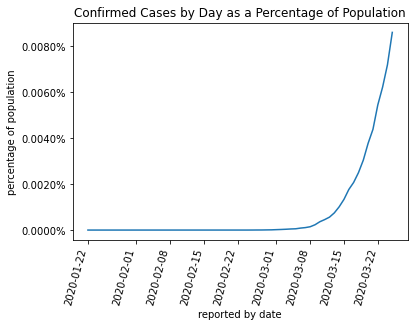

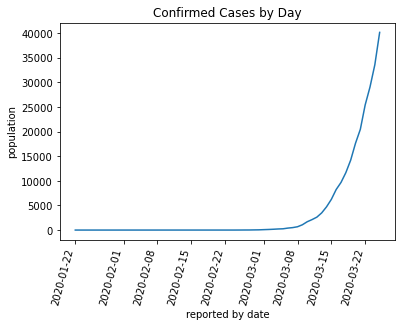

In [4]:
# beautify the Plot
fig, ax = plt.subplots()
ax.plot(dates, confirmedCases)
ax.set_title("Confirmed Cases by Day as a Percentage of Population")
ax.set_xlabel("reported by date")
ax.set_ylabel("percentage of population")
ax.yaxis.set_major_formatter(PercentFormatter())

plt.setp(ax.get_xticklabels(), rotation=75, ha='right')
plt.show()

fig, ax = plt.subplots()
ax.plot(dates, confirmedCasesTotal)
ax.set_title("Confirmed Cases by Day")
ax.set_xlabel("reported by date")
ax.set_ylabel("population")

plt.setp(ax.get_xticklabels(), rotation=75, ha='right')
plt.show()

## Rate of Growth by Day

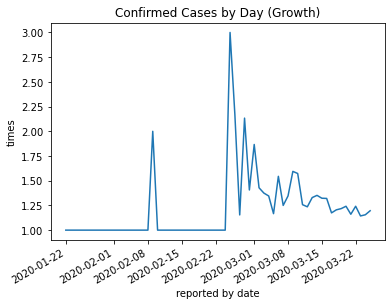

In [5]:
fig, ax = plt.subplots()
ax.plot(dates, ccR)
ax.set_title("Confirmed Cases by Day (Growth)")
ax.set_xlabel("reported by date")
ax.set_ylabel("times")
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

The maximum rate of new confirmed cases ocurred between March 23rd and the 24th reaching a massive 3x, after this time the rate seemed to continiously decrease over time, perhaps by government lockdown instructions. Confirmation on the factors that cause the decrease in the rate change will be discussed later.

## Recovered Cases

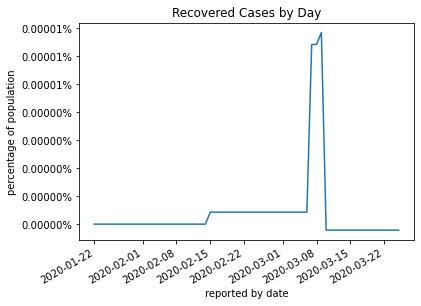

In [6]:
fig, ax = plt.subplots()
ax.plot(dates,recoveredCases)
ax.set_title("Recovered Cases by Day")
ax.set_xlabel("reported by date")
ax.set_ylabel("percentage of population")
ax.yaxis.set_major_formatter(PercentFormatter())

plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

## Cases Resulting in Death

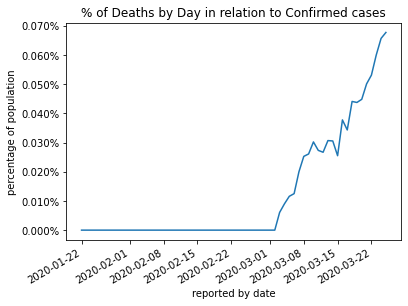

In [7]:
fig, ax = plt.subplots()
ax.plot(dates, deathsPercent)
ax.set_title("% of Deaths by Day in relation to Confirmed cases")
ax.set_xlabel("reported by date")
ax.set_ylabel("percentage of population")
ax.yaxis.set_major_formatter(PercentFormatter())

plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

## Interesting Data

In [8]:
rateNp = np.array(ccR)
avgInfectionRate = np.average(rateNp)
print("Rate of Change for Confirmed Cases Average: ", avgInfectionRate)

Rate of Change for Confirmed Cases Average:  1.2172688106083331


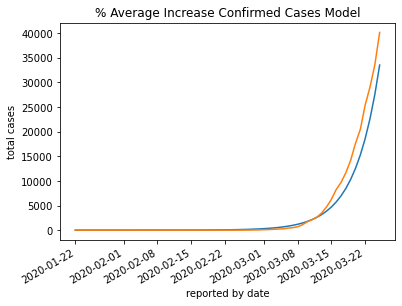

In [9]:
daysToSimulate = len(dates)
sickPeople = 1
day = 1
dayData = np.zeros(daysToSimulate)
dayDataInt = np.zeros(daysToSimulate)
for i in range(daysToSimulate):
    if i < firstDay-1:
        continue
    if i == firstDay-1:
        dayData[i] = day
    else:
        dayData[i] = day * avgInfectionRate
        day = dayData[i]

for i, day in enumerate(dayData):
    dayDataInt[i] = int(day)


fig, ax = plt.subplots()
ax.plot(dates, dayDataInt)
ax.plot(dates, confirmedCasesTotal)
ax.set_title("% Average Increase Confirmed Cases Model")
ax.set_xlabel("reported by date")
ax.set_ylabel("total cases")

plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()